In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

excluded = {'pr', 'dc'}

data = pd.read_csv("data/historical_state_population_by_year.csv", on_bad_lines='skip')
data = data[(data['year'] >= 1950) & (data['year'] <= 2014)]
data["state"]=data["state"].str.lower()

# Filter out non-states
data["state"]=data["state"][data["state"].isin(excluded)==False]
data = data.dropna(subset=['state'])



df = pd.read_csv("data/complete.csv", on_bad_lines='skip')
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
df=df[df["country"]=="us"].sort_index(level="datetime")
df["state"]=df["state"][df["state"].isin(excluded)==False]
df = df.dropna(subset=['datetime'])
df = df.sort_values(by='datetime').reset_index(drop=True)
df=df.dropna()
df['year'] = df['datetime'].dt.year
df = df[(df['year'] >= 1950) & (df['year'] <= 2014)]

# Group by state and year
grouped = df.groupby(['state', 'year']).size().reset_index(name='num_sightings')

# Create complete state-year grid
all_states = df['state'].unique()
all_years = range(1950, 2015)
full_index = pd.MultiIndex.from_product([all_states, all_years], names=['state', 'year'])

# Reindex to include all combinations, fill missing with 0
sightings_summary = grouped.set_index(['state', 'year']).reindex(full_index, fill_value=0).reset_index()
sightings_summary = sightings_summary.sort_values(by=['state', 'year']).reset_index(drop=True)


C:\Users\anton\AppData\Local\Temp\ipykernel_87100\1688881893.py:17: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/complete.csv", on_bad_lines='skip')


In [70]:
sightings_summary.head()

,state,year,num_sightings
0,ak,1950,0
1,ak,1951,0
2,ak,1952,0
3,ak,1953,0
4,ak,1954,1


In [51]:
data.head()

,state,year,population
0,ak,1950,135000
1,ak,1951,158000
2,ak,1952,189000
3,ak,1953,205000
4,ak,1954,215000


In [75]:
merged = pd.merge(data, sightings_summary, on=['state', 'year'])

# Drop any rows with missing data (just in case)
merged = merged.dropna(subset=['population', 'num_sightings'])

# Calculate correlation
correlation = merged['population'].corr(merged['num_sightings'])
correlation

0.5696297006636651

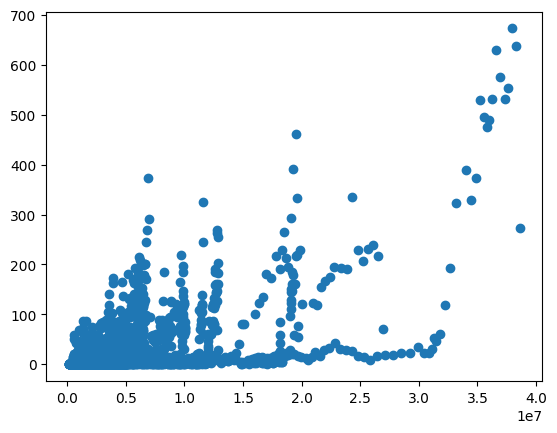

In [72]:
plt.scatter(data["population"], sightings_summary["num_sightings"], label="Population")

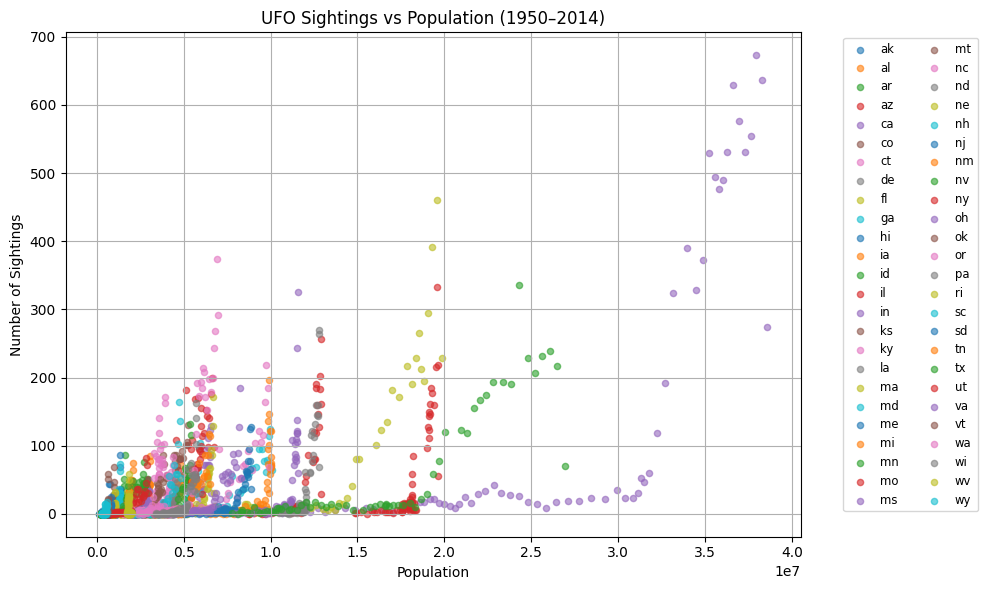

In [76]:
plt.figure(figsize=(10, 6))

# Plot each state as a different color
for state in merged['state'].unique():
    state_data = merged[merged['state'] == state]
    plt.scatter(state_data['population'], state_data['num_sightings'], label=state, alpha=0.6, s=20)

plt.title('UFO Sightings vs Population (1950–2014)')
plt.xlabel('Population')
plt.ylabel('Number of Sightings')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', ncol=2)
plt.tight_layout()
plt.grid(True)
plt.show()

In [77]:
# Group by state and calculate correlation for each
state_correlations = merged.groupby('state').apply(
    lambda g: g['population'].corr(g['num_sightings'])
).reset_index(name='correlation')

# Sort by correlation value
state_correlations = state_correlations.sort_values(by='correlation', ascending=False).reset_index(drop=True)

# Display top results
print(state_correlations.head(10))


  state  correlation
0    nv     0.900797
1    ga     0.848289
2    az     0.847839
3    sd     0.839477
4    tx     0.821473
5    nc     0.820560
6    co     0.818279
7    wa     0.810270
8    tn     0.808755
9    nm     0.796339


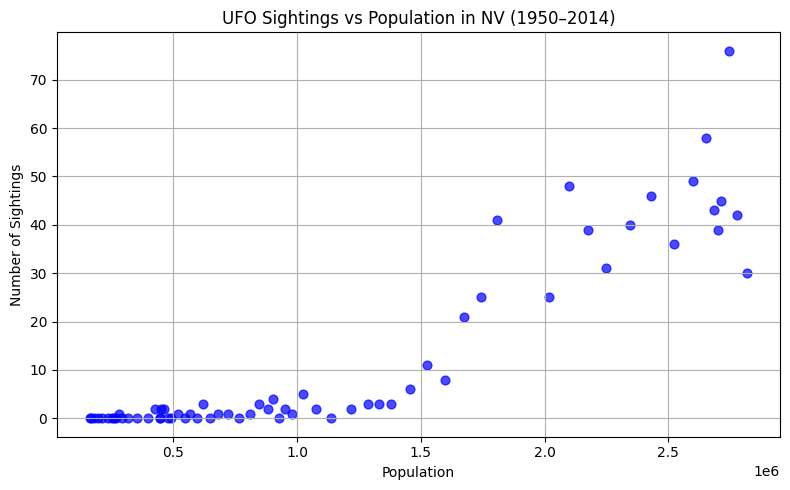

In [79]:
chosen_state = 'nv'  # Replace with any valid state abbreviation in lowercase

# Filter the data for that state
state_data = merged[merged['state'] == chosen_state]

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(state_data['population'], state_data['num_sightings'], alpha=0.7, color='blue', s=40)
plt.title(f'UFO Sightings vs Population in {chosen_state.upper()} (1950–2014)')
plt.xlabel('Population')
plt.ylabel('Number of Sightings')
plt.grid(True)
plt.tight_layout()
plt.show()
